# Independence

- **Recall:** conditional probability allows for an update in the probability of an event when additional information is realized. 
- The conditional probability $\mathbb{P}(A|B)$ can be different from $\mathbb{P}(A)$ when knowledge of the event $B$ is available.
- When $\mathbb{P}(A|B)=\mathbb{P}(A)$, the knowledge of event $B$ does not alter the probability of obtaining $A$.

Formally, two events are said to be independent if $\mathbb{P}(A \cap B)=\mathbb{P}(A)\mathbb{P}(B)$. Note that the previous definition implies that:

$\mathbb{P}(A|B)=\frac{\mathbb{P}(A \cap B)}{\mathbb{P}((B)}=\frac{\mathbb{P}(A)\mathbb{P}(B)}{\mathbb{P}(B)}=\mathbb{P}(A)$.

## Example

A card is pulled from a deck of cards and noted. The card is then replaced, the deck is shuffled, and a second card is removed and noted. **What is the probability that three cards are face cards.**

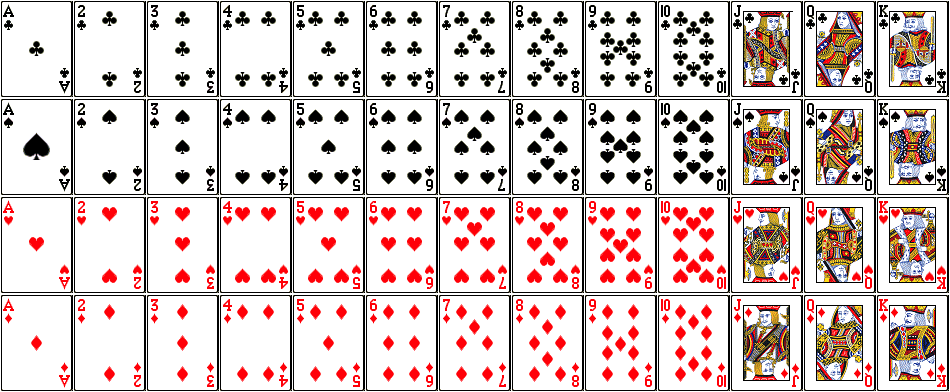

Because of replacement the two events are independent. Let F be the event of drawing a face from the deck:

$\mathbb{P}(F \cap F)=\mathbb{P}(F)\mathbb{P}(F)=\frac{12}{52}\frac{12}{52}=0.053$

### In R:

In [3]:
cards = c('A',2:10, 'J', 'Q', 'K')
suits = c('Clubs','Diamonds','Hearts','Spades')
deck <- paste0(rep(cards, length(suits)), rep(suits, each = length(cards)))
deck

[1] "AClubs"     "2Clubs"     "3Clubs"     "4Clubs"     "5Clubs"    
 [6] "6Clubs"     "7Clubs"     "8Clubs"     "9Clubs"     "10Clubs"   
[11] "JClubs"     "QClubs"     "KClubs"     "ADiamonds"  "2Diamonds" 
[16] "3Diamonds"  "4Diamonds"  "5Diamonds"  "6Diamonds"  "7Diamonds" 
[21] "8Diamonds"  "9Diamonds"  "10Diamonds" "JDiamonds"  "QDiamonds" 
[26] "KDiamonds"  "AHearts"    "2Hearts"    "3Hearts"    "4Hearts"   
[31] "5Hearts"    "6Hearts"    "7Hearts"    "8Hearts"    "9Hearts"   
[36] "10Hearts"   "JHearts"    "QHearts"    "KHearts"    "ASpades"   
[41] "2Spades"    "3Spades"    "4Spades"    "5Spades"    "6Spades"   
[46] "7Spades"    "8Spades"    "9Spades"    "10Spades"   "JSpades"   
[51] "QSpades"    "KSpades"

In [1]:
paste0('A','Clubs')

[1] "AClubs"

In [6]:
suppressWarnings(library(stringr))

In [36]:
sample(deck, 3, replace = TRUE, prob = NULL)

[1] "8Hearts"   "KClubs"    "5Diamonds"

In [45]:
sample(deck, 3, replace = T, prob = NULL)
faces<-c('J','Q','K')


vector<-sample(deck, 3, replace = T, prob = NULL)
vector[2]
str_detect(vector[2],faces)
any(str_detect(vector[2],faces))

[1] "9Diamonds" "10Clubs"   "2Diamonds"

[1] "KClubs"

[1] FALSE FALSE  TRUE

[1] TRUE

In [48]:
#Create function to calculate probabilities
faces<-c('J','Q','K')
numbers<-c('2','3','4','5','6')

prob<-function(n,cards,replace){
    face<-vector()
    for (j in 1:n){
        sample<-sample(deck, 3, replace = replace, prob = NULL)
        face<-append(face,(any(str_detect(sample[1], cards)) & any(str_detect(sample[2], cards)) 
                           & any(str_detect(sample[3], cards)))*1)   
    }
    probability<-mean(face)
    probability
}


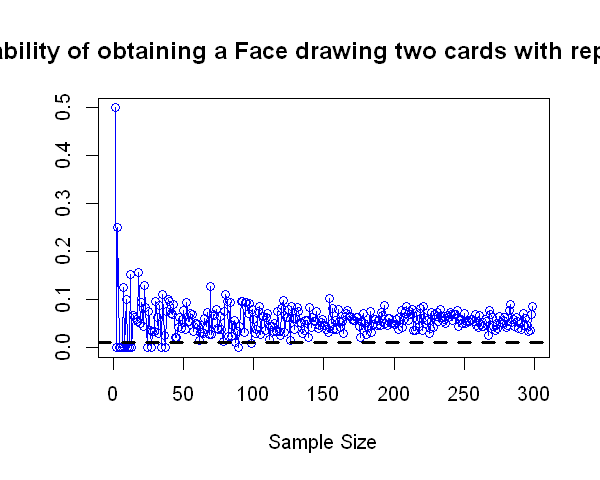

In [49]:
solution<-vector()
solution_nr<-vector()
for (n in 2:300){
    solution<-append(solution,prob(n,numbers,TRUE))
    solution_nr<-append(solution_nr,prob(n,faces,FALSE))
}

plot(solution,type="o", col="blue",ann=FALSE)
abline(h=0.011, col="black",lwd=3, lty=2)
title(main="Probability of obtaining a Face drawing two cards with replacement")
title(xlab="Sample Size")
options(repr.plot.width=5, repr.plot.height=4)